In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [2]:
path_to_kin_folder = r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\Trans_Leg_Kin'
path_to_without_kin_folder = r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\Trans_Leg'
path_to_true = r'C:\Niloofar\SCR\posture-prediction-models-main\external_data_processing\outputs\Trans_Leg_True'

In [3]:
kin_dict = {}
for item in os.listdir(path_to_kin_folder):
    selected_df = pd.read_csv(os.path.join(path_to_kin_folder, item)).drop(columns=['Unnamed: 0']).to_numpy()
    kin_dict[item.split('.')[0]] = selected_df

In [4]:
without_kin_dict = {}
for item in os.listdir(path_to_without_kin_folder):
    selected_df = pd.read_csv(os.path.join(path_to_without_kin_folder, item)).drop(columns=['Unnamed: 0']).to_numpy()
    without_kin_dict[item.split('.')[0]] = selected_df

In [5]:
true_dict = {}
for item in os.listdir(path_to_true):
    selected_df = pd.read_csv(os.path.join(path_to_true, item)).drop(columns=['Unnamed: 0']).to_numpy()
    true_dict[item.split('.')[0]] = selected_df

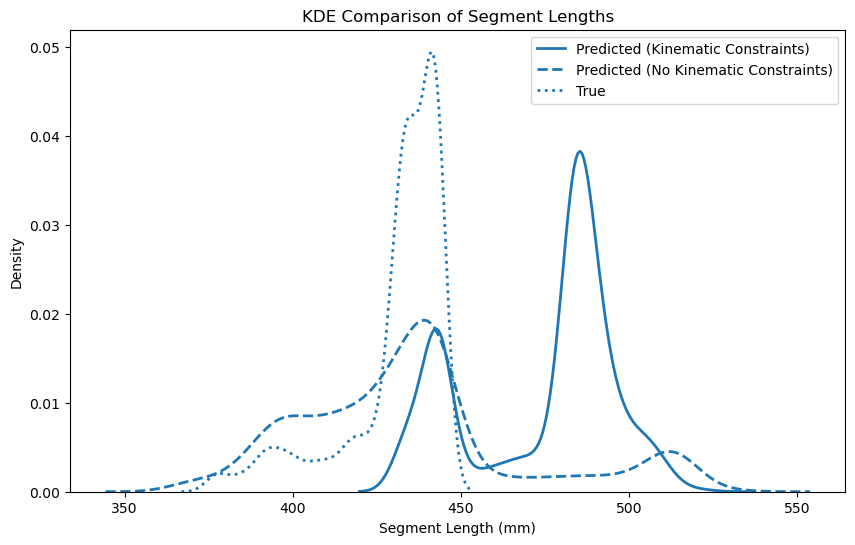

In [6]:
# Explicitly define colors using HEX color codes
color_blue = '#1f77b4'  # Blue for Kinematic Constraints
color_red = '#ff7f0e'  # Red for No Kinematic Constraints
color_green = '#2ca02c'  # Green for True

plt.figure(figsize=(10, 6))

# Ensure that the data is converted to numpy arrays, if they are pandas Series
sns.kdeplot(kin_dict['left_shank_sub_1_pred'], color=color_blue, label='Predicted (Kinematic Constraints)', linewidth=2, linestyle='-')
sns.kdeplot(without_kin_dict['left_shank_sub_1_pred'], color=color_red, label='Predicted (No Kinematic Constraints)', linewidth=2, linestyle='--')
sns.kdeplot(true_dict['left_shank_sub_1_true'], color=color_green, label='True', linewidth=2, linestyle=':')

# Adding labels, title, and legend
plt.title('KDE Comparison of Segment Lengths')
plt.xlabel('Segment Length (mm)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


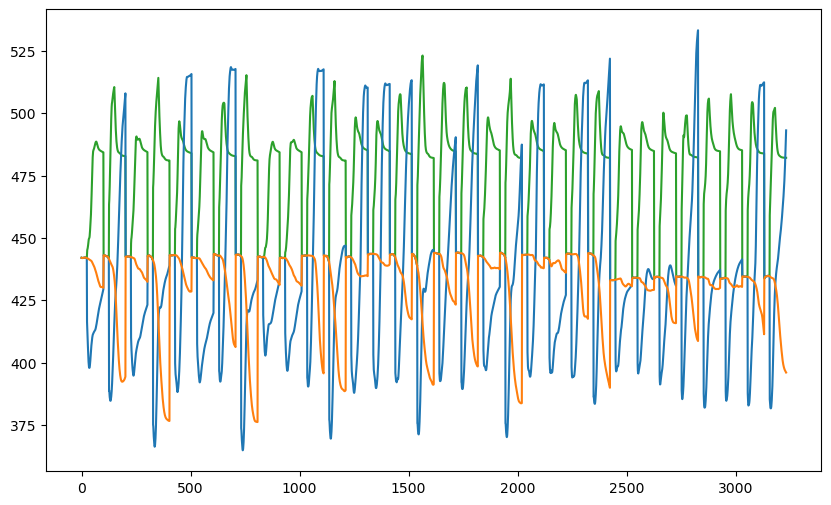

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(kin_dict['left_shank_sub_1_pred'], color_green)
plt.plot(without_kin_dict['left_shank_sub_1_pred'], color_blue)
plt.plot(true_dict['left_shank_sub_1_true'], color_red)

In [8]:
class DataVisualizer:
    def __init__(self, kin_dict, without_kin_dict, true_dict):
        """
        Initialize the visualizer with dictionaries containing the data.
        kin_dict, without_kin_dict, true_dict: Dictionaries containing the data for plotting.
        """
        self.kin_dict = kin_dict
        self.without_kin_dict = without_kin_dict
        self.true_dict = true_dict
        
        # Define the colors explicitly using HEX codes
        self.color_blue = '#1f77b4'  # Blue for Kinematic Constraints
        self.color_red = '#ff7f0e'   # Red for No Kinematic Constraints
        self.color_green = '#2ca02c' # Green for True

    def plot_kde(self, segment_pred, segment_true, figsize=(10, 6)):
        """
        Plot KDE for the specified segment.
        segment: The key for accessing the specific data (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        plt.figure(figsize=figsize)

        # Ensure the data is converted to numpy arrays if necessary
        sns.kdeplot(self.kin_dict[segment_pred], color=self.color_blue, label='Predicted (Kinematic Constraints)', linewidth=2, linestyle='-')
        sns.kdeplot(self.without_kin_dict[segment_pred], color=self.color_red, label='Predicted (No Kinematic Constraints)', linewidth=2, linestyle='--')
        sns.kdeplot(self.true_dict[segment_true], color=self.color_green, label='True', linewidth=2, linestyle=':')

        plot_name_split = segment_pred.split('_')[0: -1]
        plot_name = '_'.join(plot_name_split)


        # Adding labels, title, and legend
        plt.title(f'KDE Comparison of {plot_name}')
        plt.xlabel('Segment Length (mm)')
        plt.ylabel('Density')
        plt.legend()

        # Show the plot
        plt.show()

    def plot_line(self, segment_pred, segment_true, figsize=(10, 6)):
        """
        Plot line graph for the specified segment.
        segment: The key for accessing the specific data (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        plt.figure(figsize=figsize)

        # Plotting the line graphs for the segment
        plt.plot(self.kin_dict[segment_pred], color=self.color_green, label='Predicted (Kinematic Constraints)')
        plt.plot(self.without_kin_dict[segment_pred], color=self.color_blue, label='Predicted (No Kinematic Constraints)')
        plt.plot(self.true_dict[segment_true], color=self.color_red, label='True')

        plot_name_split = segment_pred.split('_')[0: -1]
        plot_name = '_'.join(plot_name_split)

        # Adding labels, title, and legend
        plt.title(f'Line Plot Comparison of {plot_name}')
        plt.xlabel('Time Steps')
        plt.ylabel('Segment Length (mm)')
        plt.legend()

        # Show the plot
        plt.show()

    def show_plot(self, plot_type, segment_pred, segment_true, figsize=(10, 6)):
        """
        Display the requested plot type (KDE or Line) for a given segment.
        plot_type: Either 'kde' or 'line' to specify which plot to show.
        segment: The segment to plot (e.g., 'left_shank_sub_1_pred').
        figsize: The size of the plot.
        """
        if plot_type == 'kde':
            self.plot_kde(segment_pred, segment_true, figsize)
        elif plot_type == 'line':
            self.plot_line(segment_pred, segment_true, figsize)
        else:
            raise ValueError("Invalid plot type. Choose either 'kde' or 'line'.")
        


    def calculate_stats(self, segment_pred, segment_true):
        """
        Calculate the mean and standard deviation for the three signals (predicted, true, and without constraints).
        segment_pred: The key for accessing the predicted data (e.g., 'left_shank_sub_1_pred').
        segment_true: The key for accessing the true data (e.g., 'left_shank_sub_1_true').
        Returns a dictionary with the mean and std for the three signals.
        """
        stats = {}

        # Calculate mean and std for the three signals
        kin_mean = np.mean(self.kin_dict[segment_pred])
        kin_std = np.std(self.kin_dict[segment_pred])

        without_kin_mean = np.mean(self.without_kin_dict[segment_pred])
        without_kin_std = np.std(self.without_kin_dict[segment_pred])

        true_mean = np.mean(self.true_dict[segment_true])
        true_std = np.std(self.true_dict[segment_true])

        # Store the results in a dictionary
        stats['Predicted (Kinematic Constraints)'] = {'mean': kin_mean, 'std': kin_std}
        stats['Predicted (No Kinematic Constraints)'] = {'mean': without_kin_mean, 'std': without_kin_std}
        stats['True'] = {'mean': true_mean, 'std': true_std}

        # Print the stats for all three signals
        print(f"Stats for {segment_pred} vs {segment_true}:")
        print(f"Predicted (Kinematic Constraints): Mean = {kin_mean:.2f}, Std = {kin_std:.2f}")
        print(f"Predicted (No Kinematic Constraints): Mean = {without_kin_mean:.2f}, Std = {without_kin_std:.2f}")
        print(f"True: Mean = {true_mean:.2f}, Std = {true_std:.2f}")

        return stats



## Subject 1

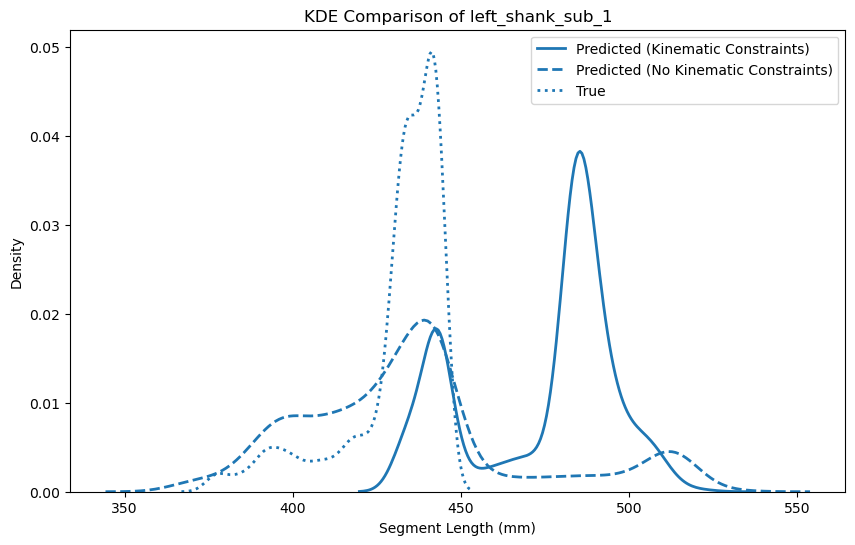

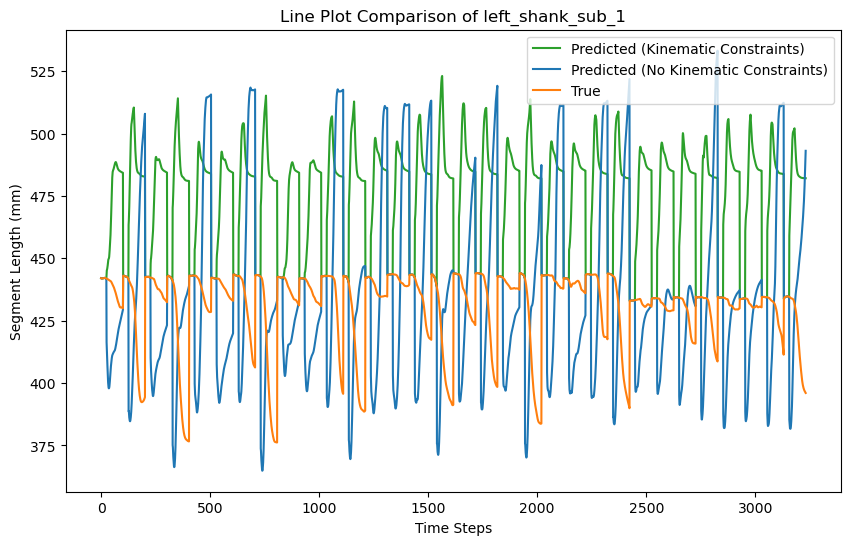

Stats for left_shank_sub_1_pred vs left_shank_sub_1_true:
Predicted (Kinematic Constraints): Mean = 474.55, Std = 22.11
Predicted (No Kinematic Constraints): Mean = 435.40, Std = 34.43
True: Mean = 430.63, Std = 15.55


In [9]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'left_shank_sub_1_pred', 'left_shank_sub_1_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'left_shank_sub_1_pred', 'left_shank_sub_1_true')

stats = visualizer.calculate_stats('left_shank_sub_1_pred', 'left_shank_sub_1_true')

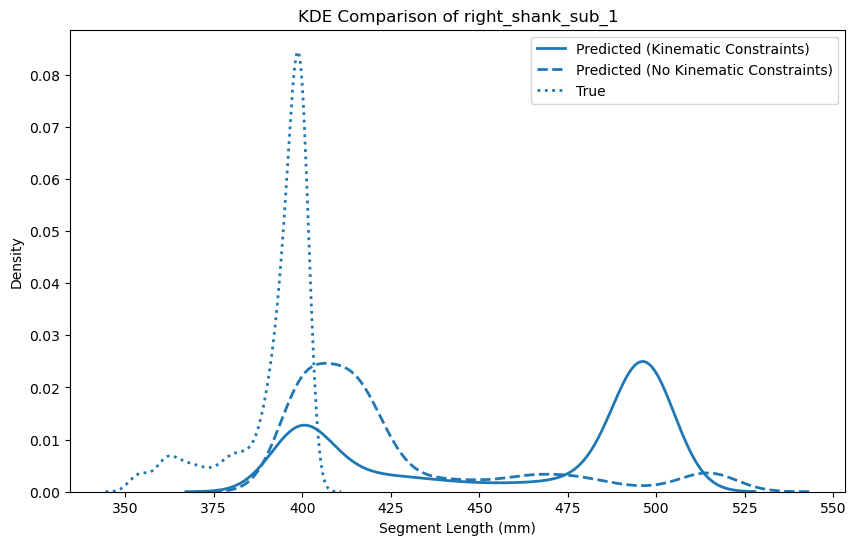

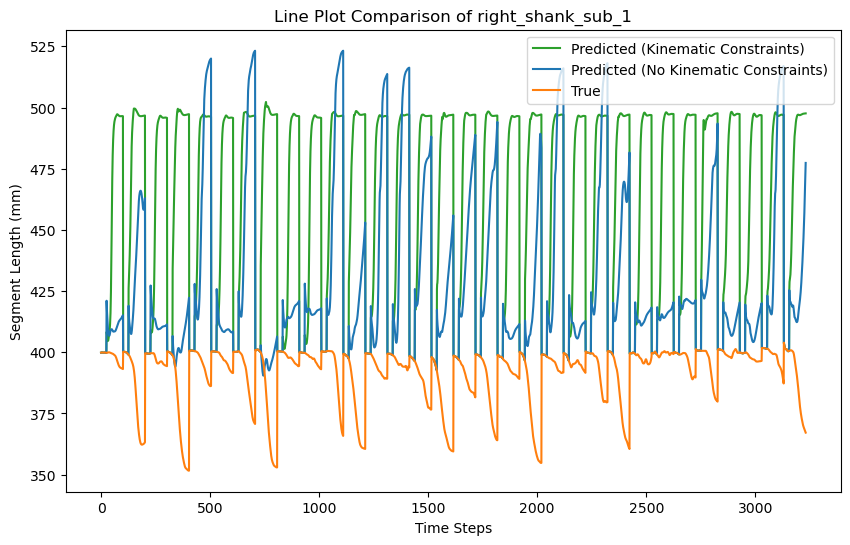

Stats for right_shank_sub_1_pred vs right_shank_sub_1_true:
Predicted (Kinematic Constraints): Mean = 460.50, Std = 42.83
Predicted (No Kinematic Constraints): Mean = 425.65, Std = 33.84
True: Mean = 391.77, Std = 11.93


In [13]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'right_shank_sub_1_pred', 'right_shank_sub_1_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'right_shank_sub_1_pred', 'right_shank_sub_1_true')

stats = visualizer.calculate_stats('right_shank_sub_1_pred', 'right_shank_sub_1_true')

## Subject 6

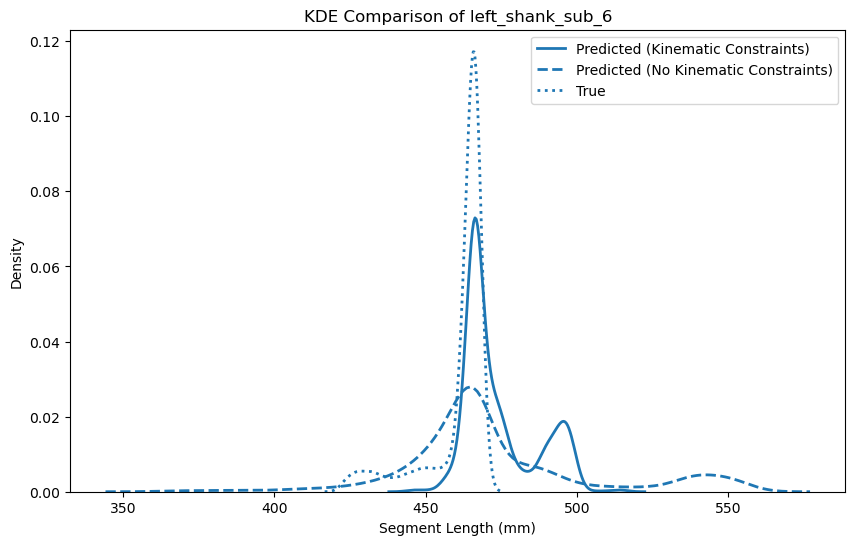

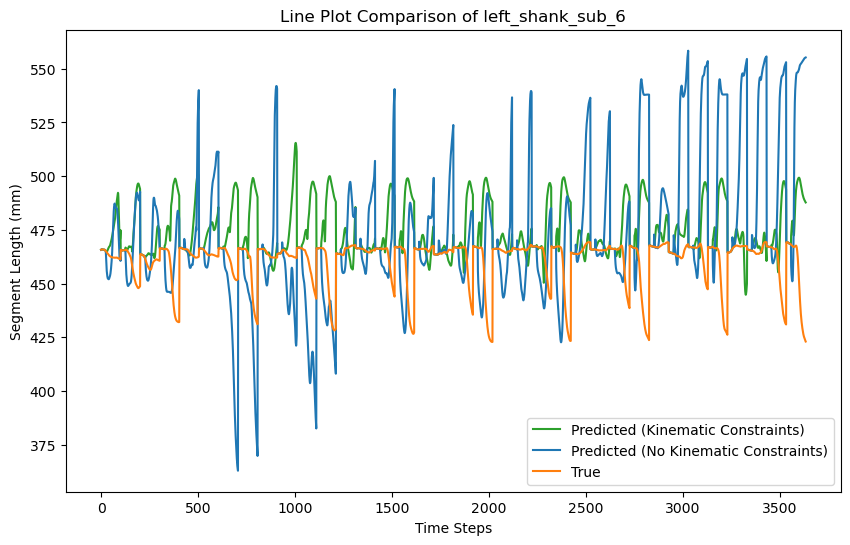

Stats for left_shank_sub_6_pred vs left_shank_sub_6_true:
Predicted (Kinematic Constraints): Mean = 473.98, Std = 11.95
Predicted (No Kinematic Constraints): Mean = 472.85, Std = 32.11
True: Mean = 460.86, Std = 10.63


In [14]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'left_shank_sub_6_pred', 'left_shank_sub_6_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'left_shank_sub_6_pred', 'left_shank_sub_6_true')

stats = visualizer.calculate_stats('left_shank_sub_6_pred', 'left_shank_sub_6_true')

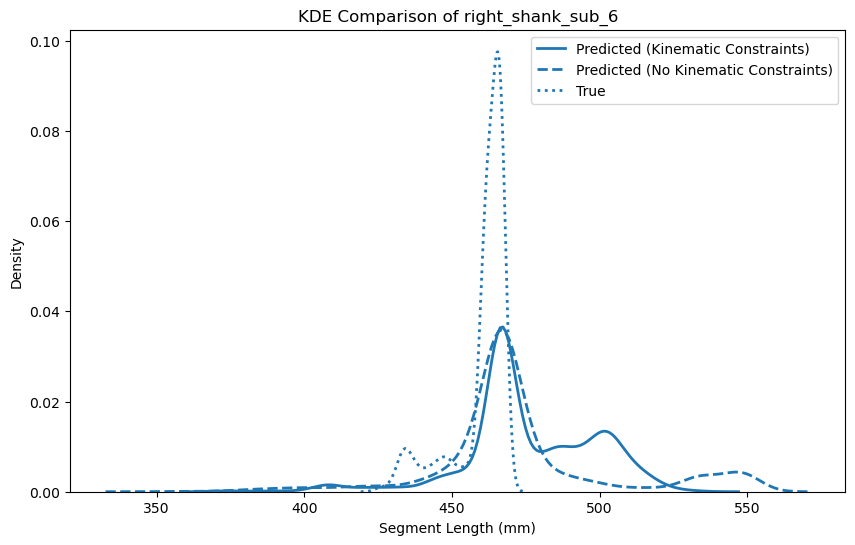

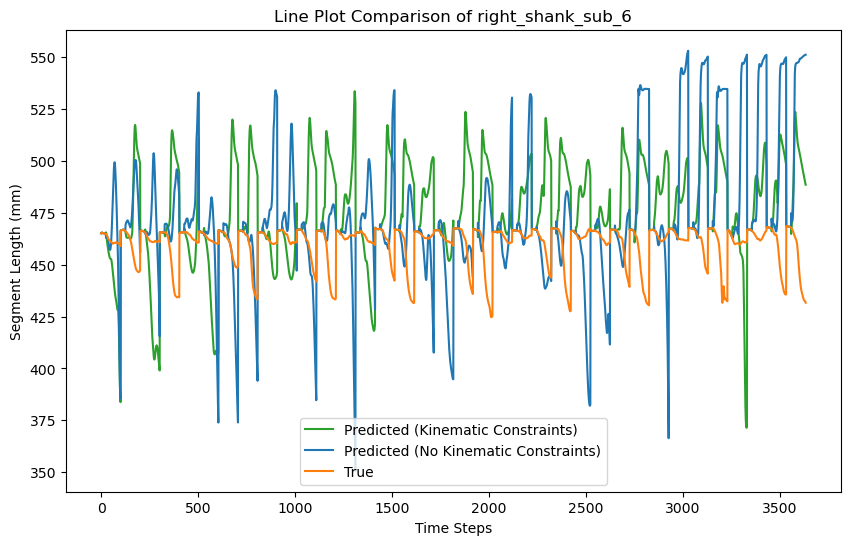

Stats for right_shank_sub_6_pred vs right_shank_sub_6_true:
Predicted (Kinematic Constraints): Mean = 475.97, Std = 22.87
Predicted (No Kinematic Constraints): Mean = 473.11, Std = 30.93
True: Mean = 459.97, Std = 9.62


In [15]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'right_shank_sub_6_pred', 'right_shank_sub_6_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'right_shank_sub_6_pred', 'right_shank_sub_6_true')

stats = visualizer.calculate_stats('right_shank_sub_6_pred', 'right_shank_sub_6_true')

## Subject 7

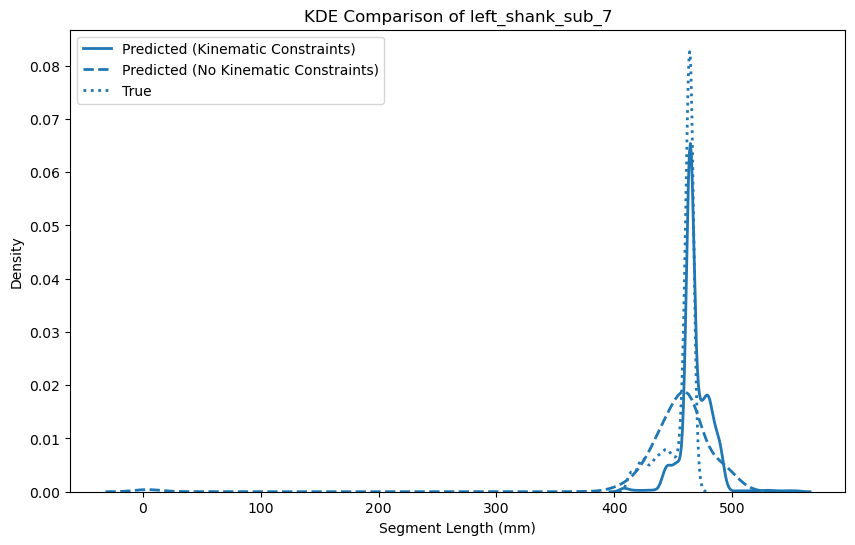

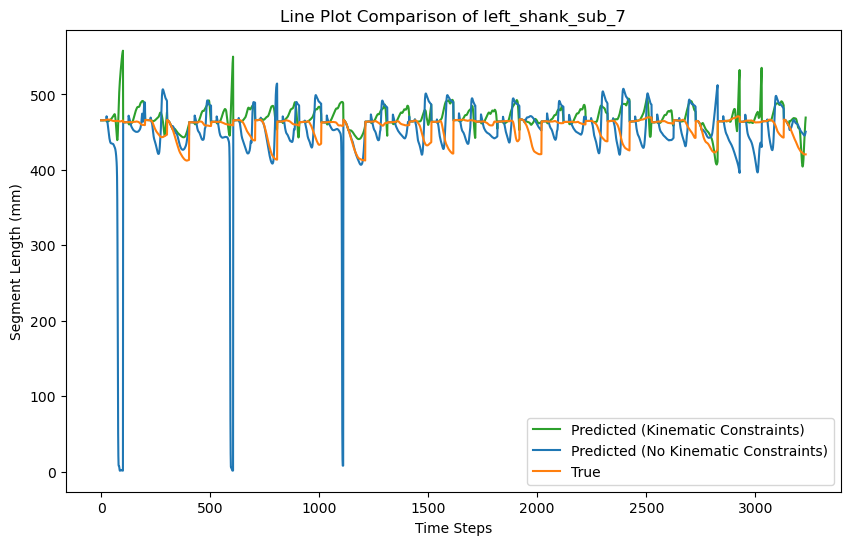

Stats for left_shank_sub_7_pred vs left_shank_sub_7_true:
Predicted (Kinematic Constraints): Mean = 468.61, Std = 13.65
Predicted (No Kinematic Constraints): Mean = 451.16, Std = 55.31
True: Mean = 456.14, Std = 14.08


In [18]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'left_shank_sub_7_pred', 'left_shank_sub_7_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'left_shank_sub_7_pred', 'left_shank_sub_7_true')

stats = visualizer.calculate_stats('left_shank_sub_7_pred', 'left_shank_sub_7_true')

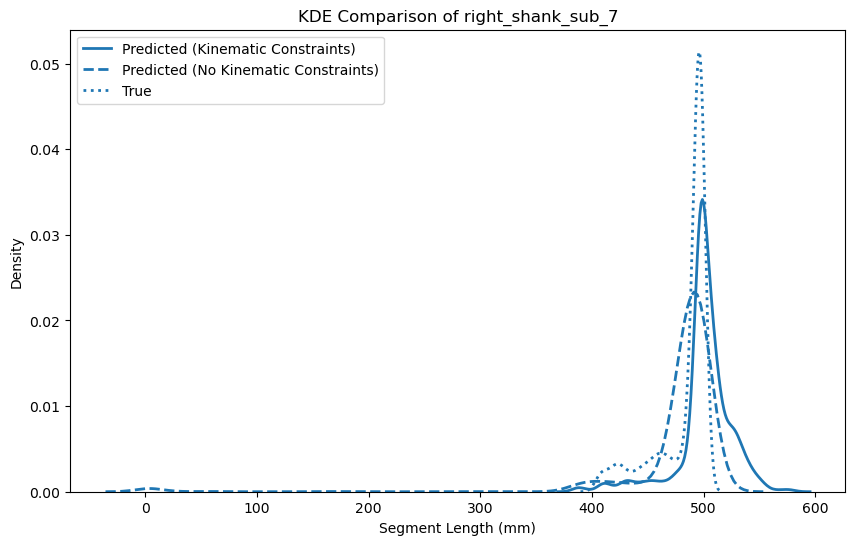

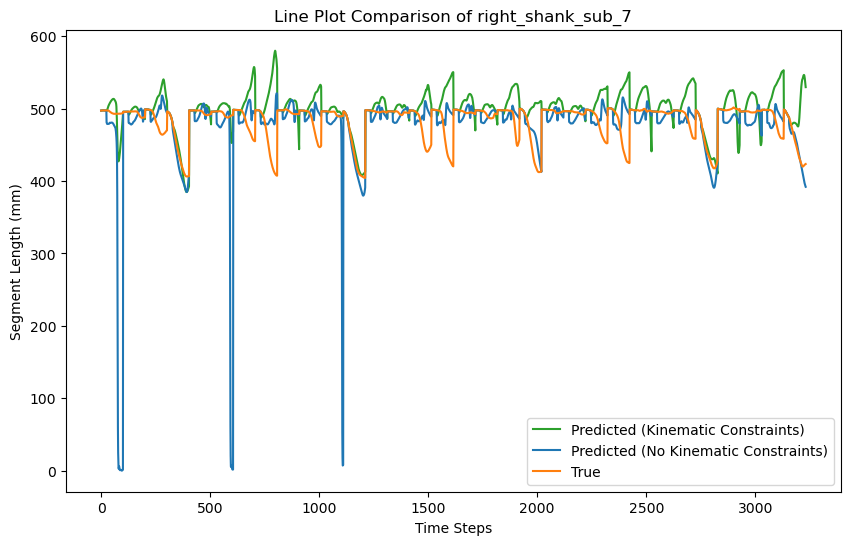

Stats for right_shank_sub_7_pred vs right_shank_sub_7_true:
Predicted (Kinematic Constraints): Mean = 500.62, Std = 25.64
Predicted (No Kinematic Constraints): Mean = 477.57, Std = 59.86
True: Mean = 482.53, Std = 24.58


In [19]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'right_shank_sub_7_pred', 'right_shank_sub_7_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'right_shank_sub_7_pred', 'right_shank_sub_7_true')

stats = visualizer.calculate_stats('right_shank_sub_7_pred', 'right_shank_sub_7_true')

## Subject 8

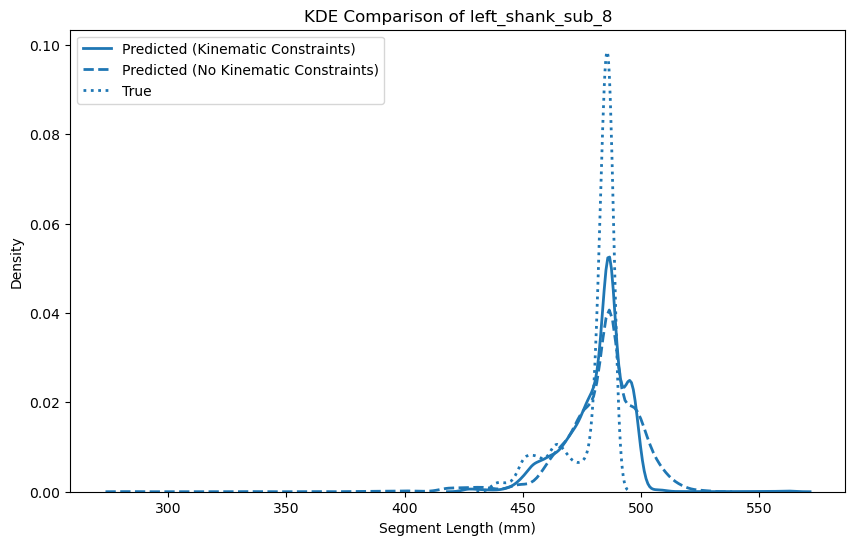

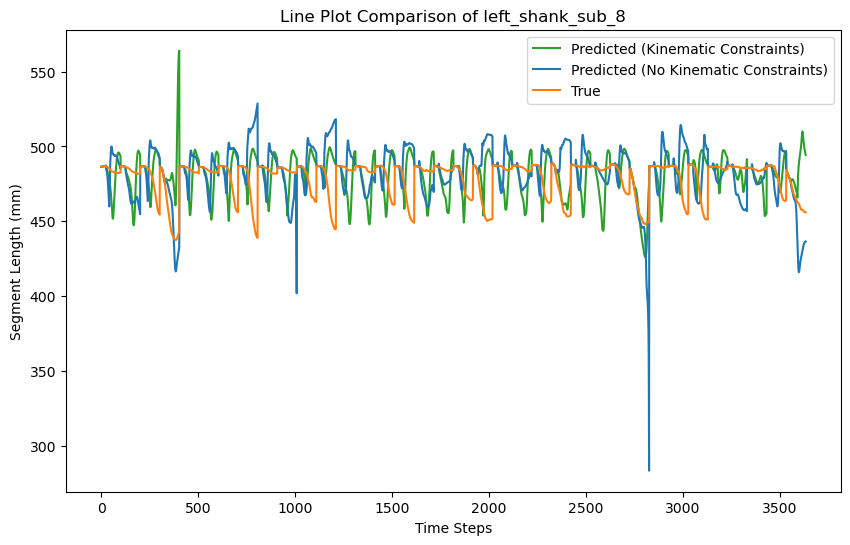

Stats for left_shank_sub_8_pred vs left_shank_sub_8_true:
Predicted (Kinematic Constraints): Mean = 481.56, Std = 13.26
Predicted (No Kinematic Constraints): Mean = 483.22, Std = 17.11
True: Mean = 478.74, Std = 12.05


In [20]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'left_shank_sub_8_pred', 'left_shank_sub_8_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'left_shank_sub_8_pred', 'left_shank_sub_8_true')

stats = visualizer.calculate_stats('left_shank_sub_8_pred', 'left_shank_sub_8_true')

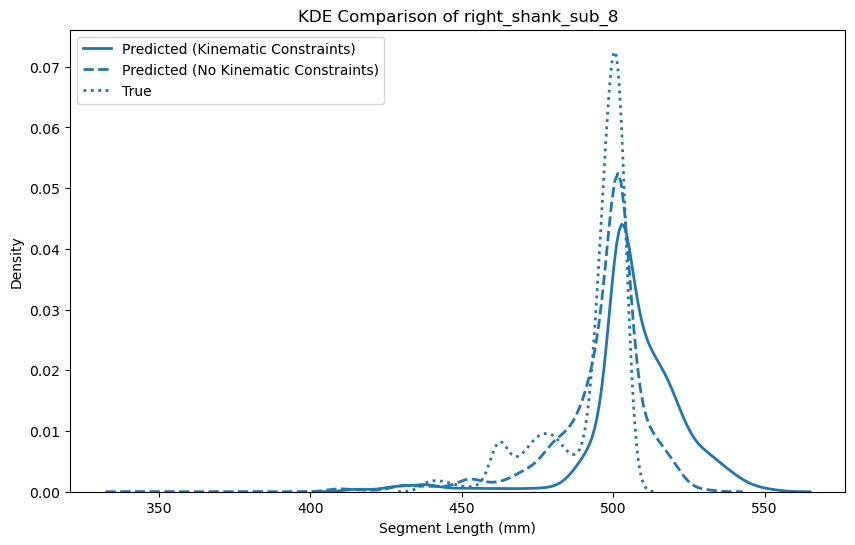

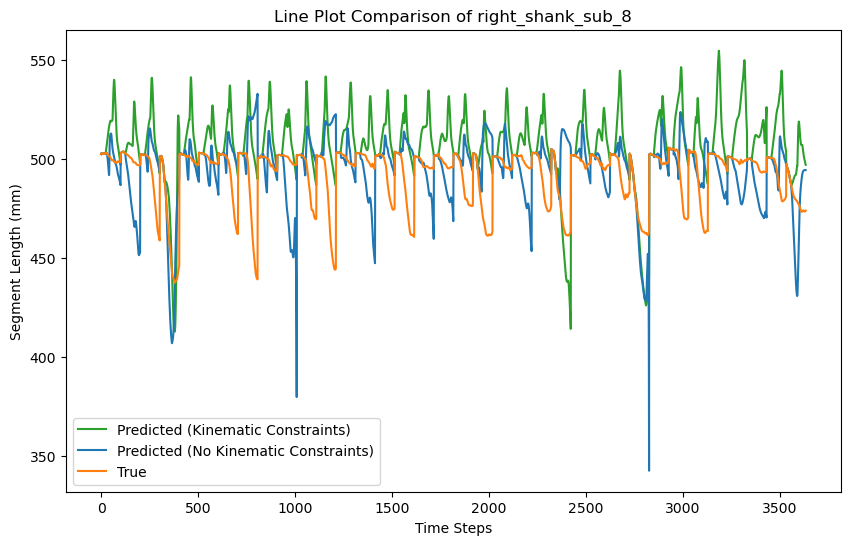

Stats for right_shank_sub_8_pred vs right_shank_sub_8_true:
Predicted (Kinematic Constraints): Mean = 506.60, Std = 18.03
Predicted (No Kinematic Constraints): Mean = 495.32, Std = 17.23
True: Mean = 492.00, Std = 14.35


In [21]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'right_shank_sub_8_pred', 'right_shank_sub_8_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'right_shank_sub_8_pred', 'right_shank_sub_8_true')

stats = visualizer.calculate_stats('right_shank_sub_8_pred', 'right_shank_sub_8_true')

## Subject 9

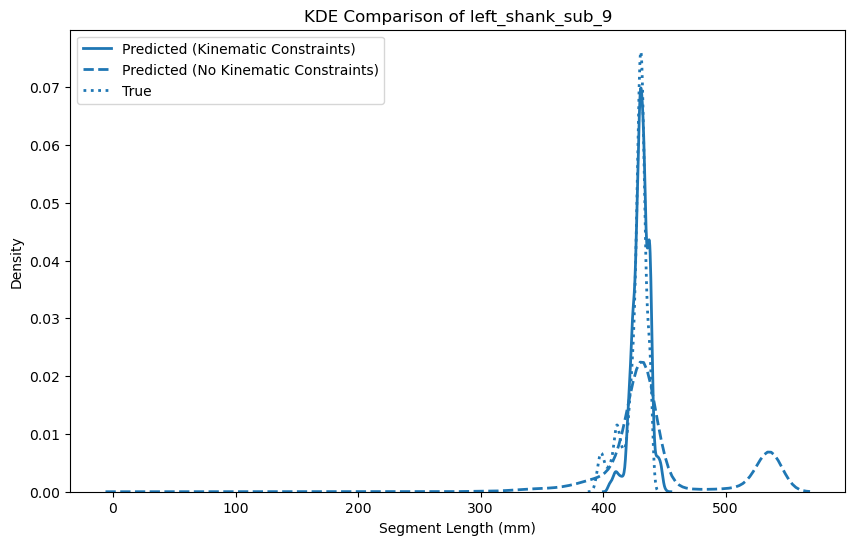

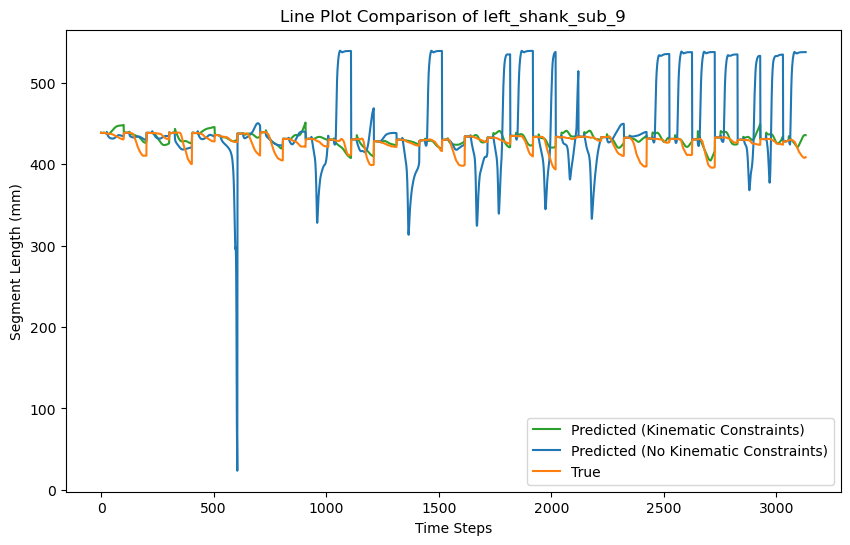

Stats for left_shank_sub_9_pred vs left_shank_sub_9_true:
Predicted (Kinematic Constraints): Mean = 430.88, Std = 6.91
Predicted (No Kinematic Constraints): Mean = 445.82, Std = 49.44
True: Mean = 426.69, Std = 9.94


In [22]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'left_shank_sub_9_pred', 'left_shank_sub_9_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'left_shank_sub_9_pred', 'left_shank_sub_9_true')

stats = visualizer.calculate_stats('left_shank_sub_9_pred', 'left_shank_sub_9_true')

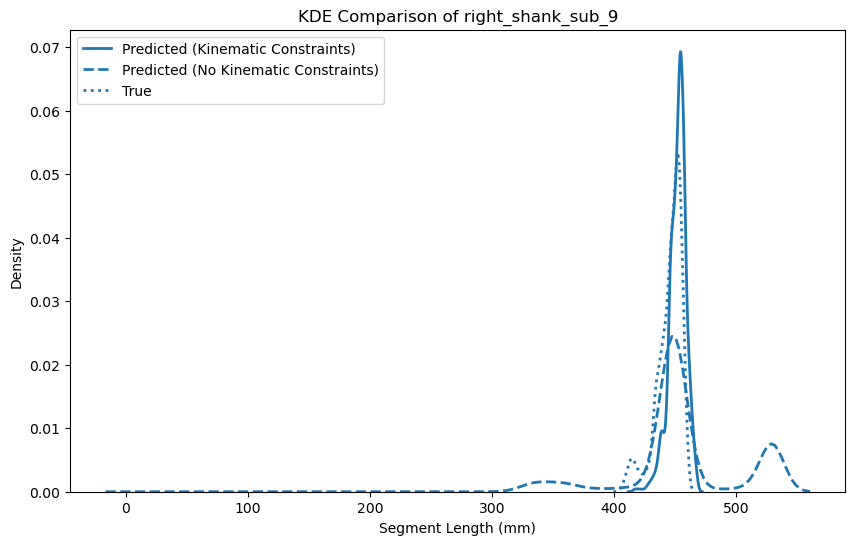

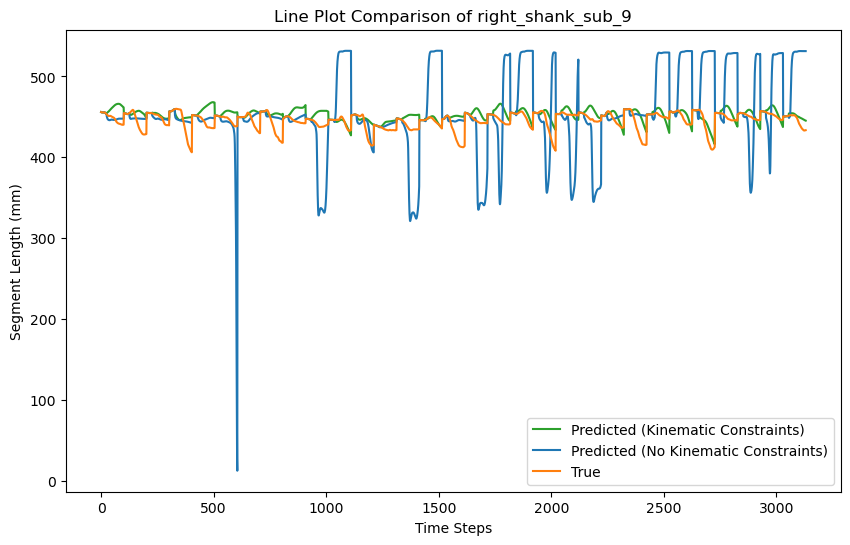

Stats for right_shank_sub_9_pred vs right_shank_sub_9_true:
Predicted (Kinematic Constraints): Mean = 452.37, Std = 7.08
Predicted (No Kinematic Constraints): Mean = 455.26, Std = 48.57
True: Mean = 445.31, Std = 10.74


In [23]:
visualizer = DataVisualizer(kin_dict, without_kin_dict, true_dict)

# Plot KDE for 'left_shank_sub_1_pred'
visualizer.show_plot('kde', 'right_shank_sub_9_pred', 'right_shank_sub_9_true')

# Plot Line graph for 'left_shank_sub_1_pred'
visualizer.show_plot('line', 'right_shank_sub_9_pred', 'right_shank_sub_9_true')

stats = visualizer.calculate_stats('right_shank_sub_9_pred', 'right_shank_sub_9_true')

## KL Divergance

In [24]:
from scipy.stats import entropy
import numpy as np

kl_div_kin_true = {}
kl_div_without_kin_true = {}

for key in true_dict.keys():
    true_dist = true_dict[key].flatten()


    temp_list = key.split('_')[0: -1]
    pred_key = '_'.join(temp_list) + '_pred'

    kin_dist = kin_dict[pred_key].flatten()
    without_kin_dist = without_kin_dict[pred_key].flatten()

    # Convert arrays to probability distributions by normalizing
    true_dist_prob = true_dist / np.sum(true_dist)
    kin_dist_prob = kin_dist / np.sum(kin_dist)
    without_kin_dist_prob = without_kin_dist / np.sum(without_kin_dist)

    # Calculate KL divergence (KL(true || kin))
    kl_div_kin_true[key] = entropy(true_dist_prob, kin_dist_prob)

    # Calculate KL divergence (KL(true || without_kin))
    kl_div_without_kin_true[key] = entropy(true_dist_prob, without_kin_dist_prob)

# Example of accessing calculated divergences
print("KL Divergence between kin_dict and true_dict:", kl_div_kin_true)
print("KL Divergence between without_kin_dict and true_dict:", kl_div_without_kin_true)


KL Divergence between kin_dict and true_dict: {'left_shank_sub_1_true': 0.002318868648836389, 'left_shank_sub_6_true': 0.0009866250310199727, 'left_shank_sub_7_true': 0.0007270010107053859, 'left_shank_sub_8_true': 0.0007598888299515578, 'left_shank_sub_9_true': 0.0001613986170203841, 'left_shank_two_sub_true': 0.0015034485983794956, 'right_shank_sub_1_true': 0.0064791884415331385, 'right_shank_sub_6_true': 0.0018442610507057623, 'right_shank_sub_7_true': 0.0021435078951019563, 'right_shank_sub_8_true': 0.0005730152560325351, 'right_shank_sub_9_true': 0.00025385827327939166, 'right_shank_two_sub_true': 0.003347390074051125}
KL Divergence between without_kin_dict and true_dict: {'left_shank_sub_1_true': 0.004679960316113464, 'left_shank_sub_6_true': 0.002737958234368034, 'left_shank_sub_7_true': 0.05035571998116877, 'left_shank_sub_8_true': 0.0009560866867478995, 'left_shank_sub_9_true': 0.007871152028845137, 'left_shank_two_sub_true': 0.012956272409696684, 'right_shank_sub_1_true': 0.0

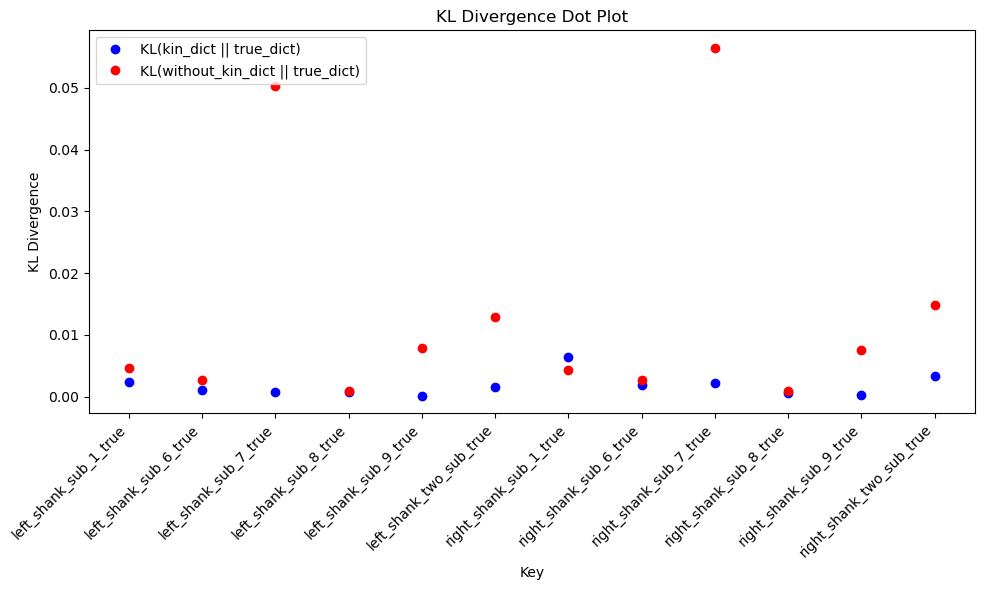

In [25]:
# Plot KL Divergence between kin_dict and true_dict using a dot plot
plt.figure(figsize=(10, 6))
plt.plot(list(kl_div_kin_true.keys()), list(kl_div_kin_true.values()), 'bo', label='KL(kin_dict || true_dict)')
plt.plot(list(kl_div_without_kin_true.keys()), list(kl_div_without_kin_true.values()), 'ro', label='KL(without_kin_dict || true_dict)')
plt.xlabel('Key')
plt.ylabel('KL Divergence')
plt.title('KL Divergence Dot Plot')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

